In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df.drop("sales", axis =1)

y = df["sales"]

# 55 sütunlu veri olusturuyoruz

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
polynomial_converter = PolynomialFeatures(degree=5, include_bias=False)

In [7]:
poly_features = polynomial_converter.fit_transform(X)   #X 

In [8]:
poly_features

array([[2.30100000e+02, 3.78000000e+01, 6.92000000e+01, ...,
        4.73480266e+08, 8.66794561e+08, 1.58683026e+09],
       [4.45000000e+01, 3.93000000e+01, 4.51000000e+01, ...,
        1.41682016e+08, 1.62591830e+08, 1.86587570e+08],
       [1.72000000e+01, 4.59000000e+01, 6.93000000e+01, ...,
        7.01172823e+08, 1.05863348e+09, 1.59832898e+09],
       ...,
       [1.77000000e+02, 9.30000000e+00, 6.40000000e+00, ...,
        2.26728346e+04, 1.56028109e+04, 1.07374182e+04],
       [2.83600000e+02, 4.20000000e+01, 6.62000000e+01, ...,
        5.11767319e+08, 8.06642775e+08, 1.27142266e+09],
       [2.32100000e+02, 8.60000000e+00, 8.70000000e+00, ...,
        4.87028819e+04, 4.92691945e+04, 4.98420921e+04]])

In [9]:
poly_features.shape

(200, 55)

# veriyi bölüyoruz

In [10]:
from sklearn.model_selection import train_test_split  #simdi elimizde yeni data varmis gibi yapiyoruz,

In [11]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [12]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape : {}\nY Test features shape : {}".format
      (X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X Train features shape: (140, 55)
y Train features shape: (140,)
X Test features shape : (60, 55)
Y Test features shape : (60,)


# scaling yapacagiz

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()

In [14]:
scaler.fit(X_train) 

StandardScaler()

In [16]:
X_train_scaled = scaler.transform(X_train)         # bir üs satırda tutulan işlem bilgilerini x_train e uygulayıp dönüştürüyoruz
X_train_scaled

array([[ 0.49300171, -0.33994238,  1.61586707, ...,  0.00704484,
         0.36731969,  0.73567879],
       [ 1.61337153,  1.32852213,  1.90079242, ...,  2.67449856,
         2.0763226 ,  1.3268794 ],
       [-0.84811893, -1.58789957, -1.02319564, ..., -0.42823202,
        -0.36509041, -0.32221291],
       ...,
       [ 1.04606563, -1.30982215,  0.27064572, ..., -0.42440306,
        -0.34885122, -0.26314509],
       [ 0.74817069,  0.03987068, -1.26608283, ..., -0.4280649 ,
        -0.36507729, -0.32226899],
       [ 0.13813882,  0.55533126,  1.01799092, ...,  0.24192258,
         0.16357974,  0.0357574 ]])

In [17]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.91339472,  1.76259419,  0.68168558, ...,  0.62770088,
         0.09523693, -0.14999627],
       [ 1.23121149,  0.23655959, -1.19601922, ..., -0.42768623,
        -0.36503783, -0.32226552],
       [-0.46002473, -0.40776614,  0.35005115, ..., -0.34929255,
        -0.2825677 , -0.24821148],
       ...,
       [-1.33115973,  1.19965698, -1.18200649, ..., -0.42673785,
        -0.36499105, -0.3222642 ],
       [ 1.3522684 , -0.23142436, -1.4389064 , ..., -0.42823197,
        -0.36509041, -0.32226987],
       [ 0.27818504, -0.06186496,  0.01841672, ..., -0.35649712,
        -0.31776442, -0.29546644]])

# Model kuruyoruz

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm = LinearRegression()

In [20]:
lm.fit(X_train_scaled, y_train)  #model egitilmis oldu.

LinearRegression()

In [21]:
y_train_pred = lm.predict(X_train_scaled)
y_pred = lm.predict(X_test_scaled) 

### modelden pred'ler yapildi ,simdi bunlarin hata oranlarina bakalim

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
              
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    return pd.DataFrame(scores)

In [57]:
ls = train_val(y_train, y_train_pred, y_test, y_pred, 'linear')
ls

,linear_train,linear_test
R2,0.988677,0.982511
mae,0.338149,0.482446
mse,0.297970,0.493743
rmse,0.545866,0.702669


#### Multicolinearaty ,yani bagimsiz degiskenler arsinda corr yüksek mi diye bakacagiz, olanlari silebiliriz

In [25]:
def color_red(val):
    
    if (0.90 < val < 1) or (-1 < val < -0.90):
        color = 'red'
    elif val == 1 :
        color = 'blue'
    else:
        color = 'black'
    return 'color: %s' % color

In [27]:
pd.DataFrame(poly_features).corr().style.applymap(color_red)

#galiba burdan f

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,1.000000,0.054809,0.056648,0.967662,0.662160,0.603099,0.050844,0.046222,0.055626,0.912265,0.721105,0.650492,0.515275,0.466823,0.420083,0.048734,0.039665,0.028958,0.039409,0.855073,0.709761,0.630912,0.584542,0.516807,0.460056,0.437080,0.409771,0.364701,0.315533,0.046959,0.032900,0.017709,0.008777,0.020708,0.801581,0.680833,0.596879,0.588127,0.506564,0.447078,0.505741,0.462847,0.403394,0.346404,0.384146,0.373602,0.343453,0.286909,0.243084,0.045768,0.026080,0.007613,-0.004329,-0.007060,0.004975
1,0.054809,1.000000,0.354104,0.078644,0.681392,0.250204,0.966752,0.708347,0.352336,0.085030,0.548158,0.217652,0.738807,0.549689,0.259887,0.912163,0.738767,0.538912,0.296300,0.084899,0.473991,0.201889,0.615548,0.449913,0.218735,0.725701,0.596713,0.435679,0.221477,0.858447,0.728288,0.578239,0.405678,0.233682,0.082679,0.420642,0.191371,0.539663,0.389348,0.198233,0.616497,0.492912,0.353459,0.181827,0.697530,0.604193,0.480872,0.335472,0.178656,0.809579,0.705871,0.590660,0.441864,0.300963,0.183753
2,0.056648,0.354104,1.000000,0.076442,0.251706,0.710860,0.361405,0.846215,0.939677,0.087403,0.223935,0.586885,0.277229,0.649722,0.744348,0.348591,0.756600,0.848977,0.820403,0.093523,0.216804,0.523625,0.251371,0.545914,0.618126,0.270379,0.595505,0.681096,0.683016,0.329318,0.689047,0.792878,0.765061,0.697417,0.097150,0.214929,0.480870,0.244256,0.490294,0.547514,0.247790,0.509593,0.561287,0.560250,0.253301,0.548691,0.643265,0.634693,0.606379,0.308883,0.629623,0.744772,0.740034,0.661761,0.595177
3,0.967662,0.078644,0.076442,1.000000,0.655610,0.604786,0.074717,0.077064,0.085473,0.984478,0.754241,0.688295,0.515837,0.483686,0.441567,0.069934,0.072344,0.066860,0.071437,0.952132,0.772650,0.694074,0.615256,0.560653,0.504148,0.439513,0.430431,0.395637,0.346060,0.064975,0.064502,0.058043,0.047638,0.050892,0.914302,0.763650,0.675974,0.643078,0.569615,0.506698,0.533678,0.507202,0.453477,0.391984,0.386548,0.394148,0.376481,0.324503,0.277483,0.060771,0.055516,0.048174,0.037872,0.028539,0.031722
4,0.662160,0.681392,0.251706,0.655610,1.000000,0.593723,0.664399,0.485959,0.241570,0.627090,0.965952,0.613323,0.962962,0.777374,0.490596,0.631071,0.502268,0.356248,0.190696,0.594024,0.910381,0.596252,0.951173,0.762204,0.504128,0.905034,0.783817,0.618268,0.392485,0.597633,0.490224,0.372765,0.250397,0.138198,0.561829,0.853111,0.571575,0.906957,0.717061,0.487728,0.905252,0.771478,0.605065,0.401054,0.848834,0.767547,0.645128,0.482578,0.309573,0.567146,0.470411,0.371193,0.262030,0.169913,0.097704
5,0.603099,0.250204,0.710860,0.604786,0.593723,1.000000,0.253924,0.576143,0.663457,0.587286,0.627367,0.969091,0.538715,0.867956,0.937710,0.241838,0.504354,0.558658,0.564313,0.564874,0.627426,0.921108,0.583577,0.860898,0.909793,0.489275,0.786042,0.847498,0.826914,0.224767,0.448703,0.503393,0.481855,0.460299,0.542113,0.617954,0.873051,0.594081,0.826298,0.859458,0.536670,0.794702,0.826686,0.797872,0.443163,0.720646,0.800253,0.764051,0.714386,0.207342,0.399518,0.456294,0.445350,0.396279,0.372849
6,0.050844,0.966752,0.361405,0.074717,0.664399,0.253924,1.000000,0.717856,0.356512,0.081937,0.536793,0.221874,0.768358,0.554347,0.259786,0.985102,0.783297,0.552534,0.297371,0.082618,0.465376,0.206476,0.640765,0.454135,0.219410,0.787473,0.628876,0.439364,0.217841,0.955280,0.798072,0.614792,0.414209,0.232155,0.080961,0.413689,0.196065,0.561681,0.393295,0.199027,0.668950,0.518426,0.355656,0.179322,0.779714,0.658326,0.503108,0.333459,0.172715,0.921100,0.792812,0.646188,0.465716,0.303686,0.180208
7,0.046222,0.708347,0.846215,0.077064,0.485959,0.576143,0.717856,1.000000,0.834543,0.095289,0.411600,0.485136,0.543085,0.756910,0.620568,0.695496,0.977682,0.941437,0.743549,0.107359,0.378923,0.445148,0.471052,0.633268,0.518778,0.539793,0.763229,0.738939,0.573946,0.664420,0.935782,0.944307,0.819946,0.636391,0.116108,0.358969,0.420758,0.435308,0.565920,0.469426,0

### Cross validation

In [43]:
from sklearn.metrics import SCORERS
from sklearn.model_selection import cross_validate, cross_val_score

In [44]:
model = LinearRegression()

In [45]:
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 
                                                                   'neg_mean_absolute_error',
                                                                   'neg_mean_squared_error',
                                                                   'neg_root_mean_squared_error'], cv = 5)

# cross train setine yapiliyor    
# verimizi,yani X_train_scaled i icine verdik ve onu cross yapiyor  
# icindeki kirmizilardan dolayi,cikti olarak bize hata oranlarini veriyor                                                             

In [46]:
scores

{'fit_time': array([0.00240421, 0.002321  , 0.00104403, 0.00089383, 0.00086403]),
 'score_time': array([0.00081611, 0.00077295, 0.00050712, 0.00053191, 0.00049591]),
 'test_r2': array([0.36790198, 0.87965778, 0.97756048, 0.98936937, 0.16659583]),
 'test_neg_mean_absolute_error': array([-1.27124712, -0.71046265, -0.39503284, -0.41897731, -1.47409318]),
 'test_neg_mean_squared_error': array([-19.20425854,  -2.71329198,  -0.62290055,  -0.28936097,
        -15.40985579]),
 'test_neg_root_mean_squared_error': array([-4.38226637, -1.64720733, -0.78924049, -0.53792283, -3.92553892])}

In [66]:
scores = pd.DataFrame(scores, index = range(1,6))
scores

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.001103,0.000616,0.988913,-0.405789,-0.336840,-0.580379
2,0.000831,0.000576,0.969951,-0.551469,-0.677493,-0.823099
3,0.000641,0.000578,0.950978,-0.552320,-1.360795,-1.166531
4,0.000587,0.000509,0.991259,-0.365106,-0.237919,-0.487769
5,0.000478,0.000476,0.986854,-0.343011,-0.243072,-0.493023


In [48]:
scores.iloc[:, 2:].mean()

test_r2                             0.676217
test_neg_mean_absolute_error       -0.853963
test_neg_mean_squared_error        -7.647934
test_neg_root_mean_squared_error   -2.256435
dtype: float64

testin cross'una bakalim

In [49]:
scores = cross_validate(model, X_test_scaled, y_test, scoring = ['r2', 
                                                                   'neg_mean_absolute_error',
                                                                   'neg_mean_squared_error',
                                                                   'neg_root_mean_squared_error'], cv = 5)

In [50]:
scores = pd.DataFrame(scores, index = range(1,6))
scores

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.000960,0.000675,-1.831095,-5.783127,-53.695651,-7.327732
2,0.000828,0.001856,0.159705,-3.907894,-37.701894,-6.140187
3,0.001089,0.000679,-1.932117,-3.553303,-57.447291,-7.579399
4,0.000811,0.000616,-1150.802325,-25.317446,-7182.367345,-84.748849
5,0.000779,0.000653,-11.985114,-14.464560,-402.264412,-20.056530


In [68]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df.head()

,lm_coef
0,13.942084
1,-3.147845
2,0.622117
3,-58.348614
4,17.227695


# Ridge Regression

In [51]:
from sklearn.linear_model import Ridge

In [52]:
ridge_model = Ridge(alpha=1, random_state=42)

In [53]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

In [54]:
y_pred = ridge_model.predict(X_test_scaled)   #normal bir Ridgeye tahmin yaptiriliyor

y_train_pred = ridge_model.predict(X_train_scaled)

In [55]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.988677,0.982511
mae,0.338149,0.482446
mse,0.297970,0.493743
rmse,0.545866,0.702669


In [58]:
pd.concat([ls, rs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.988677,0.982511,0.988677,0.982511
mae,0.338149,0.482446,0.338149,0.482446
mse,0.297970,0.493743,0.297970,0.493743
rmse,0.545866,0.702669,0.545866,0.702669


cross'lu Ridge bakalim    Alpha=1 ile

train setinin degerlerine bakalim

In [59]:
model = Ridge(alpha=1, random_state=42) 
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [60]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                             0.977591
test_neg_mean_absolute_error       -0.443539
test_neg_mean_squared_error        -0.571224
test_neg_root_mean_squared_error   -0.710160
dtype: float64

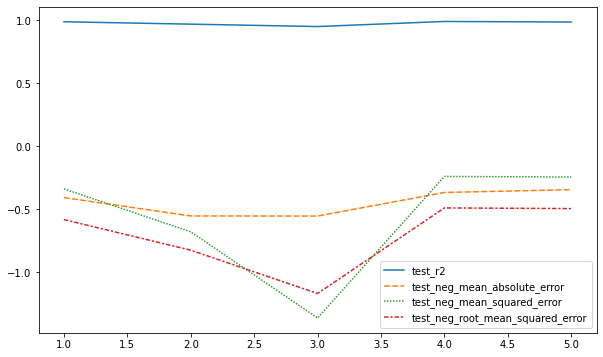

In [61]:
sns.lineplot(data = scores.iloc[:,2:])
plt.show()

In [64]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])
rm_df.head()

,ridge_coef_1
0,3.428822
1,0.689086
2,0.170305
3,-0.910850
4,2.723077


In [70]:
pd.concat([lm_df,rm_df], axis = 1).head()

,lm_coef,ridge_coef_1
0,13.942084,3.428822
1,-3.147845,0.689086
2,0.622117,0.170305
3,-58.348614,-0.910850
4,17.227695,2.723077


## en iy alpha degerine bakalim

In [71]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [72]:
from sklearn.linear_model import RidgeCV

In [73]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")

In [75]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [76]:
ridge_cv_model.alpha_ 

0.02

In [77]:
ridge_cv_model.best_score_  #galiba en kücük rmse degeri

-0.6530406519553228

# Best alpha ile Ridge kurup tahmin yapalim

In [97]:
ridge_model_tuned = Ridge(ridge_cv_model.alpha_, random_state=42)

In [98]:
ridge_model_tuned.fit(X_train_scaled, y_train)

Ridge(alpha=0.02, random_state=42)

In [99]:
y_pred = ridge_model_tuned.predict(X_test_scaled)   #normal bir Ridgeye tahmin yaptiriliyor

y_train_pred = ridge_model_tuned.predict(X_train_scaled)

In [100]:
rs_tuned = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_tuned")
rs_tuned

,ridge_tuned_train,ridge_tuned_test
R2,0.994491,0.983643
mae,0.244842,0.442087
mse,0.144977,0.461803
rmse,0.380758,0.679561


In [101]:
pd.concat([ls, rs,rs_tuned], axis=1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_tuned_train,ridge_tuned_test
R2,0.988677,0.982511,0.988677,0.982511,0.994491,0.983643
mae,0.338149,0.482446,0.338149,0.482446,0.244842,0.442087
mse,0.297970,0.493743,0.297970,0.493743,0.144977,0.461803
rmse,0.545866,0.702669,0.545866,0.702669,0.380758,0.679561


Best alpha ile Ridge ile  train'in cross'lu degerlerine bakalim

In [111]:
model = Ridge(ridge_cv_model.alpha_, random_state=42) 
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [112]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                             0.980607
test_neg_mean_absolute_error       -0.403075
test_neg_mean_squared_error        -0.463681
test_neg_root_mean_squared_error   -0.653041
dtype: float64

Best alpha ile Ridge ile  test'in  cross'lu degerlerine bakalim

In [113]:
model = Ridge(ridge_cv_model.alpha_, random_state=42) 
scores = cross_validate(model, X_test_scaled, y_test,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [114]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                             0.228983
test_neg_mean_absolute_error       -0.977934
test_neg_mean_squared_error        -5.948926
test_neg_root_mean_squared_error   -1.877676
dtype: float64